# ECE 445 (ML for ENGG): Dec-10 In-Class Exercise

*Eric Jiang
ewj12 158002948*

12/10/2018

Set 1) Least Squares Regression
1. Implement least squares regression

In [140]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
B= '\033[1m'
E= '\033[0m'

In [5]:
#Retrieve the boston samples
bsamps = load_boston(return_X_y=True)

#Augment bsamps with 1's
BA = np.concatenate((bsamps[0],np.ones((506, 1)),(bsamps[1])[:,None]), axis=1)

In [141]:
#Retrieve X (506x14) and b(506x1) vals
X = BA[:,:-1]
b = BA[:,-1][:,None]

#Set the Least Squares formula
LS = lambda X,b: np.linalg.inv(np.transpose(X)@X)@np.transpose(X)@b

#Calculate the Least Squares for solving w
Y = LS(X,b)

#Calculate the predicted Y to find error
y_pred = X@Y

#LS Error formula
error = math.pow(np.linalg.norm(y_pred - b,2),2)/X.shape[0]
print(B+"LS Error ="+E, error)

LS Error = 21.8977792176875


2. LS Regression using 5-fold Cross

In [158]:
#Scramble the boston samples in random orders
randfolds = np.random.permutation(BA.shape[0])

#Split the scrambled samples into 5 k-folds
k = 5
foldsize = randfolds.size/k
fs = math.floor(foldsize)
split5 = [1*fs,2*fs,3*fs,4*fs,5*fs+1] #make sure remainder is in last fold
f1, f2, f3, f4, f5, err_remainder = np.array(np.split(BA[randfolds],split5))
print("check if any remainder not in a fold =", err_remainder)

check if any remainder not in a fold = []


Errors: [21.307959961684322, 23.872190117668342, 22.88616312524308, 19.102609214696045, 22.315834507856888]
Error Variation 3.302707512540191
Average prediction Error: 21.896951385429738


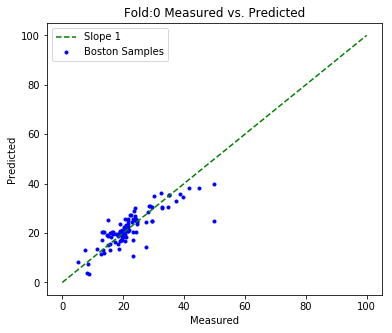

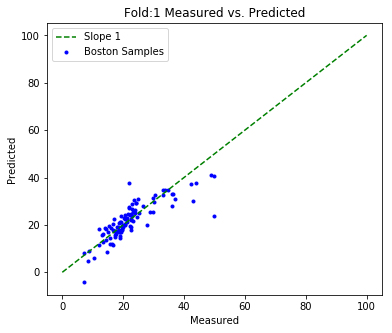

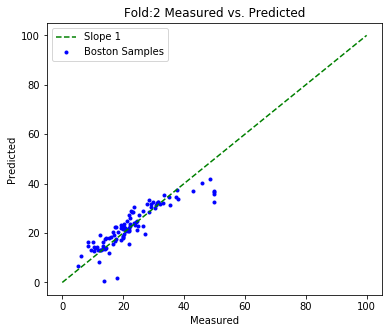

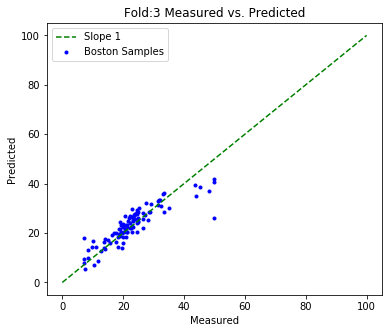

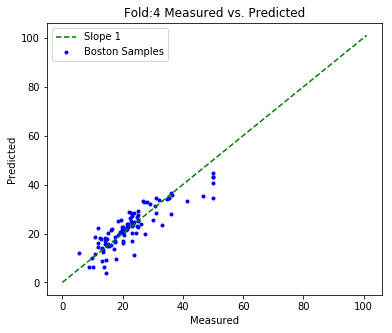

In [188]:
#Define function to find mean
def mean(numbers):
    return sum(numbers)/float(len(numbers))

#Define function to find variance
def variance(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return variance

#Set error array to append all errors per fold
errors = []

#Loop through folds to LS regression each set
for i in range(0,5):
    
    #Set folds into an array to iterate through each
    folds = [f1,f2,f3,f4,f5]
    arr = folds[i]
    
    #Create a new training array for LS testing
    training = np.array([[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]).transpose()
    for a in folds:
        training = np.concatenate((training,a))
        
    #print(training.shape)
    #Least Squares Regression on Training
    X = training[:,:-1]
    b = training[:,-1][:,None]
    Y = LS(X,b)
    
    #Calculate predicted output
    y_pred = arr[:,:-1]@Y
    
    #Calculate Prediction Error
    error = math.pow(np.linalg.norm(y_pred - arr[:,-1][:,None], 2),2)/y_pred.shape[0]
    
    #Plot Each fold Measured vs. Predicted along with slope 1
    plt.figure(figsize=(6,5))
    plt.scatter(arr[:,-1][:,None], y_pred, color='b', marker='.', label = 'Boston Samples')
    plt.plot(np.arange(y_pred.shape[0]),np.arange(y_pred.shape[0]), 'g--', label = 'Slope 1')
    
    plt.title('Fold:'+str(i)+' Measured vs. Predicted')
    plt.xlabel('Measured')
    plt.ylabel('Predicted')
    plt.legend()
    
    #Append the predicted error onto errors array
    errors.append(error)

#Calculate mean & variance of predicted errors
mean1 = mean(errors)
var1 = variance(errors)

print(B+'Errors:'+E, errors)
print(B+'Error Variation'+E, var1)
print(B+'Average prediction Error:'+E, mean1)

Set 2) Ridged Regression

In [256]:
#Set Ridged Regression Formula
RR = lambda X,b,l: np.linalg.inv(np.transpose(X)@X + l*np.identity(X.shape[1]))@X.transpose()@b

In [259]:
#Set errorcomp to infinite for iterative comparison
errorcomp = math.inf

#Find lambda by setting step points between (0,1)

#Iterate through these step points to find best lambda
lambda_vals = np.linspace(0,1,100)
for l in lambda_vals:
    
    for i in range(0,5):
        #Set folds into an array to iterate through each
        folds = [f1,f2,f3,f4,f5]
        arr = folds[i]
        
        #Garbage Clean to reset the folds for next iteration
        del folds[i]
        del folds[i%4]
        
        #Create a new training array for RR training
        training = np.array([[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]).transpose()
        for a in folds:
            training = np.concatenate((training,a),axis=0)
            
        #Ridged Regression on Training
        X = training[:,:-1]
        b = training[:,-1][:,None]
        Y = RR(X,b,l)
        
        #Calculate Predicted Output
        pred = arr[:,:-1]@Y
        
        #Calculate Prediction Error
        error = math.pow(np.linalg.norm(pred - arr[:,-1][:,None], 2),2)/pred.shape[0]
        
        #Compare errors to find best lambda
        if error < errorcomp:
            errorcomp = error
            lamb = l
        
print(B+'Lamda Val:'+E, lamb)


Lamda Val: 0.686868686868687


In [260]:
#Set error array to append all errors per fold
errors = []

#Loop through folds to LS regression each set
for i in range(0,5):
    
    #Set folds into an array to iterate through each
    folds = [f1,f2,f3,f4,f5]
    arr = folds[i]
    
    #Create a new training array for RR training
    training = np.array([[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]).transpose()
    for a in folds:
        training = np.concatenate((training,a))
        
    #print(training.shape)
    #Ridged Regression on Training
    X = training[:,:-1]
    b = training[:,-1][:,None]
    Y = RR(X,b,l)
    
    #Calculate predicted output
    y_pred = arr[:,:-1]@Y
    
    #Calculate Prediction Error
    error = math.pow(np.linalg.norm(y_pred - arr[:,-1][:,None], 2),2)/y_pred.shape[0]
    
    #Append the predicted error onto errors array
    errors.append(error)

#Calculate mean & variance of predicted errors
mean1 = mean(errors)
var1 = variance(errors)

print(B+'Errors:'+E, errors)
print(B+'Error Variation'+E, var1)
print(B+'Average prediction Error:'+E, mean1)

Errors: [23.183657656477322, 25.749199141447594, 24.87789125173342, 18.379499831384276, 21.20917106069348]
Error Variation 8.790504940169214
Average prediction Error: 22.67988378834722
